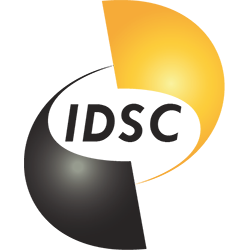 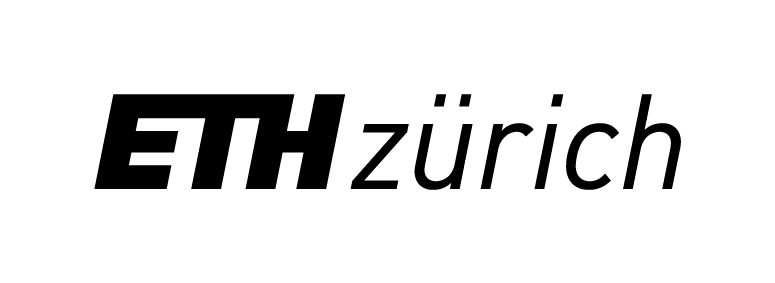

# Python Controls Library Exercises
&copy; 2024 ETH Zurich, Ivan Robuschi, Niclas Scheuer, Kalle Laitinen, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

## Introduction

Welcome to the CSII Jupyter Notebooks! This first notebook is designed to help you become familiar with the `control` library in Python, a powerful tool for analyzing and designing control systems. The exercises are structured to cover various aspects of the library, from basic transfer function creation to the analysis of time and frequency responses. By the end of this session, you'll have worked with control systems and even designed a low pass filter.

**Note**: Before you begin, make sure to install the `control`, `matplotlib` and `cs2solutions` libraries by running the following commands:


In [ ]:
%pip install cs2solutions

Then, import them:

In [ ]:
from cs2solutions import intro
import control as ct
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1 - Transfer function creation
In this exercise, you'll start by creating a transfer function for a simple system using the Python Controls Library.

The transfer function is the following:
$$
    G(s) = \frac{s}{s^2+2s+1}
$$

Create the corresponding `ct.TransferFunction` object in the following code cell. Feel free to refer to the documentation if needed.

In [ ]:
def create_transfer_function() -> ct.TransferFunction:
    """
    Creates a transfer function for the given system.

    Returns:
    - tf: ct.TransferFunction, the transfer function G(s)
    """

    #TODO replace the following line with your implementation.
    tf = None

    return tf

In the next cell, the solution is implemented. Please note that, while you are allowed to look at it, solving the exercise yourself comes with a much greater benefit.

Once you are done with the implementation, run the following cell to test your implementation:

In [ ]:
intro.test_create_transfer_function(create_transfer_function, intro.sol_create_transfer_function)

You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/16e62bc5ffb6bd01a437e472fc30f809e7cd0409/src/cs2solutions/intro.py#L26-L39

## Exercise 2 - Time Response Analysis

Next up, let's practice the creation of plots.
Use the functions `ct.step_response()` and `plt.plot()` to plot the step response of the system.
Hint: You may also use your implementation of Exercise 1.

In [ ]:
def plot_step_response(tf: ct.TransferFunction):
    #TODO replace the next line with your implementation
    pass

Execute the following cell to test your implementation:

In [ ]:
tf = create_transfer_function()
# tf = intro.sol_create_transfer_function()
intro.test_plot_step_response(plot_step_response, intro.sol_plot_step_response, tf, False)

You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/16e62bc5ffb6bd01a437e472fc30f809e7cd0409/src/cs2solutions/intro.py#L73-L98

## Exercise 3 - Bode plot
Let's now create the Bode plot for this system. In the next cell, use the `control` library to create the Bode plot (no other modules are needed). In order to find the right function and its usage, make sure to check out the library documentation.

In [ ]:
def bode_plot(tf: ct.TransferFunction):
    #TODO replace the next line with your implementation
    pass

Run this cell to see your plot:

In [ ]:
print("Your Bode plot:")
bode_plot(create_transfer_function())

Should you need the solution, run the following cell:

In [ ]:
print("Solution:")
intro.sol_bode_plot(intro.sol_create_transfer_function())

You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/16e62bc5ffb6bd01a437e472fc30f809e7cd0409/src/cs2solutions/intro.py#L127-L140

## Exercise 4 - Low pass filter design

Congratulations for solving the previous exercises! Now that you are getting to know the `controls` library, it's time to put your fresh skills into use by designing a functional system.

You are now in charge of implementing a new control system for the Polybahn. In order to do so, you want to measure the speed of the wagon in real-time. In an effort to keep the costs low, you are provided with a cheap sensor that outputs a really noisy signal.

Luckily, as a well-known controls engineer, you immediately know how to solve this problem: you can suppress noise using a low-pass filter.

### 4.1 - Design

You decide to go for a first order system with the following transfer function:
$$
G(s) = \frac{1}{1+a \cdot s}
$$
Where $a$ is a constant of your choice.

As you may remember from CS1, the cutoff frequency $\omega_c$ of such a filter is the frequency at which the magnitude of the transfer function is $\frac{1}{\sqrt{2}}$. Find $a$ for a given $\omega_c$.

Hint: Replace $s$ with $j\omega_c$.

### 4.2 - Implementation

To suppress the noise, you choose $\omega_c$ to be 0.8. In the following code cell, create a `TransferFunction` object that represents your transfer function. Use your result from 4.1.

In [ ]:
def get_filter_tf(omega_c: float) -> ct.TransferFunction:

    #Replace the following line with your implementation.
    tf = None

    return tf

The following cell displays your transfer function and the corresponding Bode plot. Feel free to use it to check your implementation.

In [ ]:
omega_c = 0.8 # Set cutoff frequency

print("Your implementation:")
your_tf = get_filter_tf(omega_c)

print(your_tf)

if isinstance(your_tf, ct.TransferFunction):
    intro.sol_bode_plot(get_filter_tf(omega_c))

intro.test_create_filter_tf(get_filter_tf, intro.sol_get_filter_tf, omega_c, True)

If you are stuck and need the solution, execute the following cell.

In [ ]:
print(intro.sol_get_filter_tf(omega_c, True))
print("Here is the Bode plot:")
intro.sol_bode_plot(intro.sol_get_filter_tf(omega_c, False))

You may also find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/16e62bc5ffb6bd01a437e472fc30f809e7cd0409/src/cs2solutions/intro.py#L143-L166

### 4.3 - Testing
Let's now test the time response of the system. This next code snippet generates a noisy speed signal for one Polybahn ride, as measured by the sensor. Run it and take a look at the graph.

In [ ]:
sampling_rate = 10
noise_level = 0.3

def generate_noisy_speed_signal(sampling_rate: float, noise_level: float):
    """
    Generate a noisy speed signal for one Polybahn ride.

    Parameters:
    sampling_rate (float): Number of data points per second.
    noise_level (float): Standard deviation of the noise.

    Returns:
    np.ndarray: Time array.
    np.ndarray: Noisy speed signal.
    """
    # Time arrays for each phase
    t1 = np.arange(0, 20, 1/sampling_rate) # Stay at 0 for 20 seconds
    t2 = np.arange(20, 40, 1/sampling_rate) # Ramp up to 15 over 20 seconds
    t3 = np.arange(40, 70, 1/sampling_rate) # Stay at 15 for 30 seconds
    t4 = np.arange(70, 90, 1/sampling_rate) # Ramp down to 0 over 20 seconds
    t5 = np.arange(90, 110, 1/sampling_rate) # Stay at 0 for 20 seconds

    # Generate speed profile for each phase
    speed1 = np.zeros_like(t1)
    speed2 = 15 * (np.sin(np.pi * (t2 - 20) / 40))**2  # Squared sine curve
    speed3 = np.full_like(t3, 15)
    speed4 = 15 * (np.sin(np.pi * (t4 - 70) / 40 + np.pi/2))**2  # Squared sine curve
    speed5 = np.zeros_like(t5)

    # Combine phases
    t = np.concatenate((t1, t2, t3, t4, t5))
    base_speed = np.concatenate((speed1, speed2, speed3, speed4, speed5))

    # Add Gaussian noise
    noise = np.random.normal(0, noise_level, size=t.shape)
    noisy_speed = base_speed + noise

    return t, noisy_speed

# Generate the signal
time, noisy_speed = generate_noisy_speed_signal(sampling_rate, noise_level)

# Plotting the signal
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_speed, label="Noisy Speed")
plt.xlabel("Time (seconds)")
plt.ylabel("Speed")
plt.title("Noisy Speed Measurement")
plt.legend()
plt.show()

As you can see, the signal is pretty noisy. Run the next cell to apply your low pass filter to the signal.

In [ ]:
def apply_low_pass_filter(noisy_signal: np.ndarray, sampling_rate: float, omega_c: float):
    """
    Apply the low pass filter to the noisy signal.

    Parameters:
    noisy_signal (np.ndarray): The noisy signal.
    sampling_rate (float): The sampling rate of the signal.
    omega_c (float): Cutoff frequency for the low-pass filter.

    Returns:
    np.ndarray: The filtered signal.
    """
    # Time array
    t = np.arange(0, len(noisy_signal) / sampling_rate, 1 / sampling_rate)

    # Define the low pass filter
    system = intro.sol_get_filter_tf(omega_c, False)

    # Discretize the system
    system_discrete = ct.sample_system(system, 1/sampling_rate, method='zoh')

    # Apply the filter
    _, filtered_signal = ct.forced_response(system_discrete, T=t, U=noisy_signal)

    return t, filtered_signal

def plot_signals(time: np.ndarray, original_signal: np.ndarray, filtered_signal: np.ndarray):
    """
    Plot the original and filtered signals.

    Parameters:
    time (np.ndarray): Array of time points.
    original_signal (np.ndarray): The original noisy signal.
    filtered_signal (np.ndarray): The filtered signal.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(time, original_signal, label='Noisy Signal', color='blue')
    plt.plot(time, filtered_signal, label='Filtered Signal', color='red')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Signal')
    plt.title('Original and Filtered Signals')
    plt.legend()
    plt.grid(True)
    plt.show()


time, noisy_signal = generate_noisy_speed_signal(sampling_rate, noise_level)
time, filtered_signal = apply_low_pass_filter(noisy_signal, sampling_rate, omega_c)
plot_signals(time, noisy_signal, filtered_signal)

As you can see, this filter really helps you get a cleaner signal, but it generally introduces significant phase delay. Keep this in mind when designing filters in real-life situations.
To get a feel for this, play with the values for `omega_c`, `sampling_rate` and `noise_level` and take a look at the effect on the noisy and filtered signals.

### Congrats!

You have successfully solved the full notebook. Have fun with the course! :)